Support vector classifier in AMPL
Gabriel Fortuny Carretero i Pau Mateo Bernadó
Optimització Matemàtica


In [ ]:
from sklearn.datasets import make_classification, make_swiss_roll
X_train, y_train = make_classification(n_samples=300,n_features=3,n_redundant=0,n_repeated=0)
X_test, y_test = make_classification(n_samples=300,n_features=3,n_redundant=0,n_repeated=0)

# Swiss roll data generation + adaptation

In [ ]:
X_train.shape

(300, 3)

In [ ]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
def passar_a_menys_un(y):
  for i in range(len(y)):
    if not y[i]:
      y[i] = -1

In [ ]:
passar_a_menys_un(y_train)
passar_a_menys_un(y_test)
y_train

array([-1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1

In [ ]:
y_test

array([ 1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1

In [ ]:
print('# data2/train_100')
print(f"param m := 100;")
print('param n := 7')
print(f'param nu := 0.9;')
print('param y_train :=')
for x, y in enumerate(y_train):
    print(x+1, y)
print(';')
print('param A_train : 1 2 3 4 5 6 7 :=')
for x, y in enumerate(X_train):
    print(x+1, end='')
    for i in y:
       print(' ',i,end='')
    print()
print(';')
print('param y_test :=')
for x, y in enumerate(y_test):
  print(x+1, y)
print(';')
print('param A_test : 1 2 3 4 5 6 7 :=')
for x, y in enumerate(X_test):
    print(x+1, end='')
    for i in y:
       print(' ',i,end='')
    print()
print(';')


# data2/train_100
param m := 100;
param n := 7
param nu := 0.9;
param y_train :=
1 -1
2 -1
3 1
4 -1
5 -1
6 -1
7 1
8 -1
9 -1
10 -1
11 -1
12 -1
13 -1
14 1
15 -1
16 -1
17 1
18 -1
19 1
20 -1
21 -1
22 -1
23 1
24 1
25 -1
26 1
27 1
28 1
29 -1
30 1
31 1
32 1
33 -1
34 1
35 -1
36 1
37 1
38 -1
39 1
40 -1
41 1
42 -1
43 1
44 1
45 -1
46 1
47 -1
48 1
49 1
50 -1
51 1
52 -1
53 1
54 1
55 -1
56 -1
57 1
58 1
59 -1
60 1
61 1
62 1
63 -1
64 -1
65 1
66 1
67 -1
68 -1
69 1
70 1
71 -1
72 1
73 -1
74 -1
75 -1
76 -1
77 -1
78 -1
79 1
80 -1
81 -1
82 1
83 -1
84 -1
85 1
86 1
87 1
88 1
89 -1
90 1
91 -1
92 -1
93 -1
94 -1
95 1
96 1
97 1
98 -1
99 -1
100 -1
101 1
102 -1
103 -1
104 -1
105 1
106 -1
107 1
108 -1
109 1
110 -1
111 1
112 1
113 1
114 1
115 1
116 -1
117 -1
118 -1
119 -1
120 1
121 1
122 1
123 1
124 -1
125 1
126 1
127 1
128 1
129 -1
130 1
131 1
132 -1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 -1
141 -1
142 1
143 -1
144 1
145 -1
146 -1
147 -1
148 -1
149 -1
150 1
151 -1
152 -1
153 -1
154 1
155 -1
156 -1
157 -1
158 

# SWISS ROLl :))

In [ ]:
X_nl_train, y_nl_train = make_swiss_roll(n_samples=2000, noise=0.0, random_state=2, hole=False)
X_nl_test, y_nl_test = make_swiss_roll(n_samples=800, noise=0.0, random_state=None, hole=False)

<ipython-input-6-f44f825ceeeb>:16: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-6-f44f825ceeeb>:17: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-6-f44f825ceeeb>:18: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


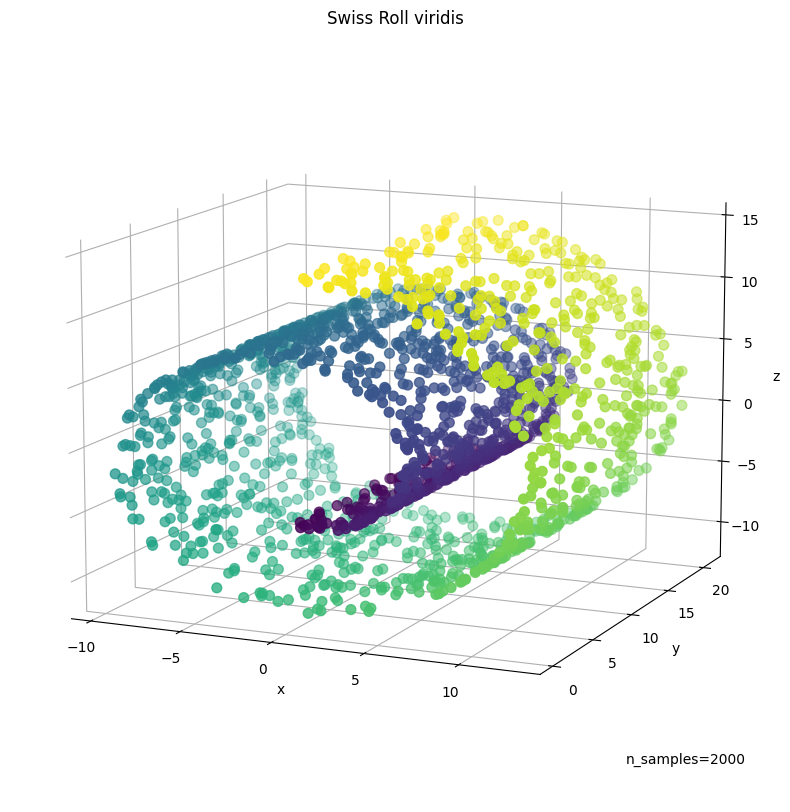

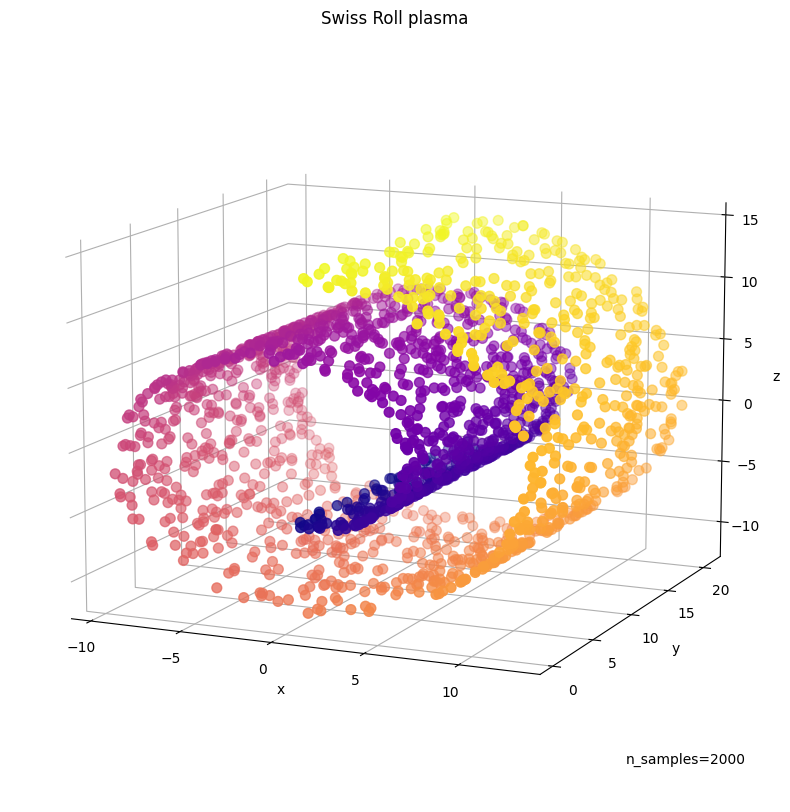

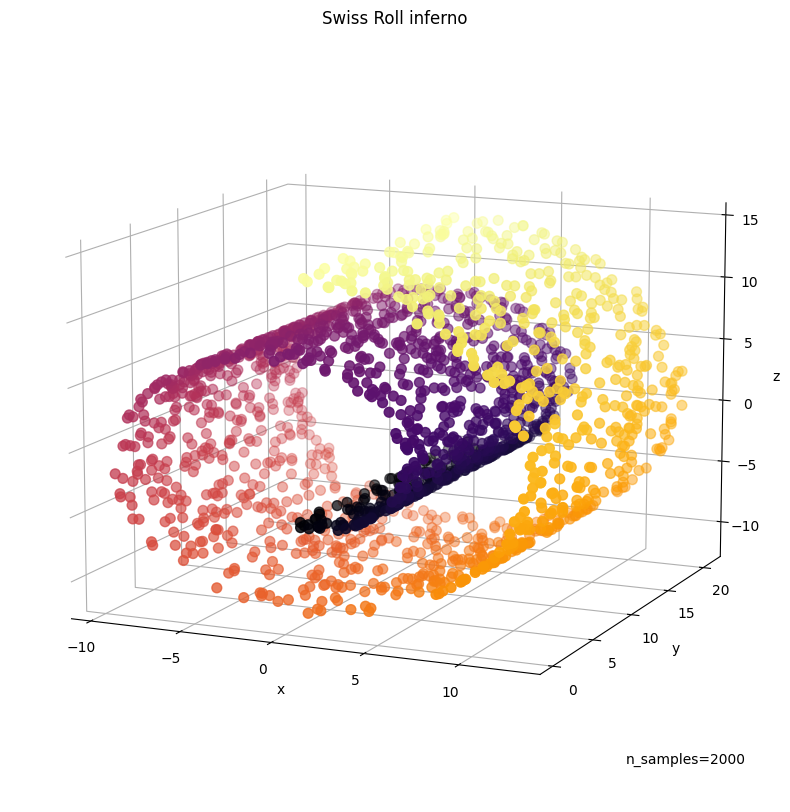

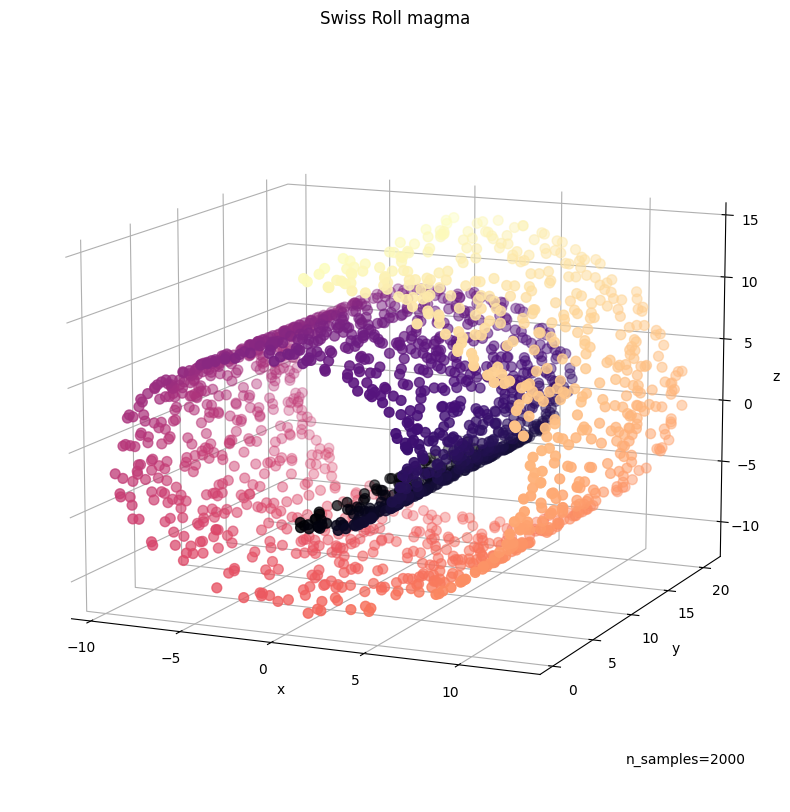

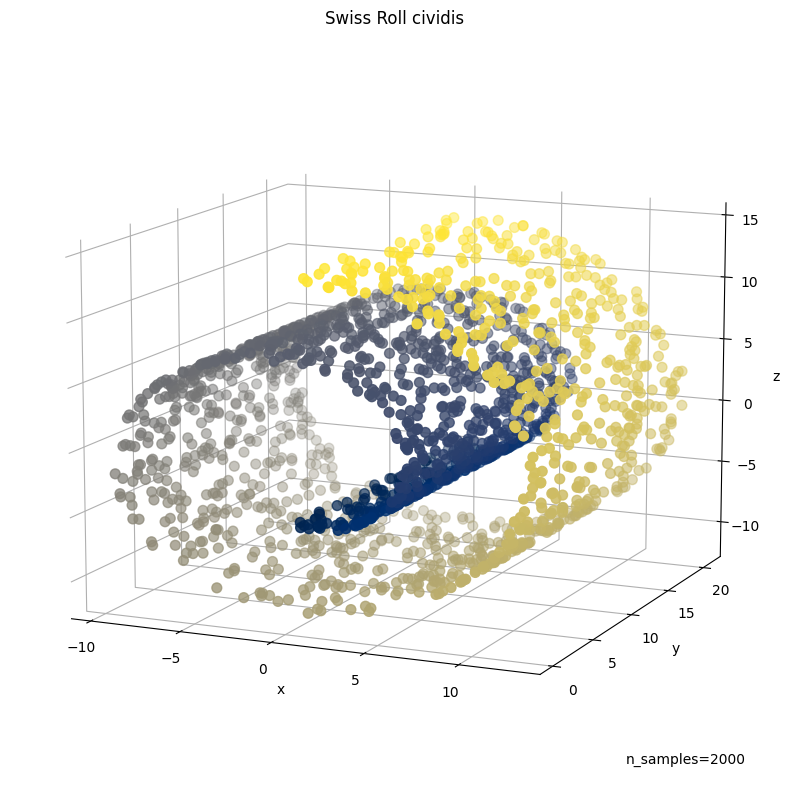

In [ ]:
from scripts import *
import matplotlib.pyplot as plt

for i in ['viridis', 'plasma', 'inferno', 'magma', 'cividis']:

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_nl_train[:, 0], X_nl_train[:, 1], X_nl_train[:, 2], c=y_nl_train, cmap=plt.get_cmap(i), s=50)
  ax.set_title('Swiss Roll ' + i)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.view_init(azim=-66, elev=12)
  _ = ax.text2D(0.8, 0.05, s="n_samples=2000", transform=ax.transAxes)
  # set white background
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()

<ipython-input-7-c68882acc244>:11: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-7-c68882acc244>:12: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-7-c68882acc244>:13: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


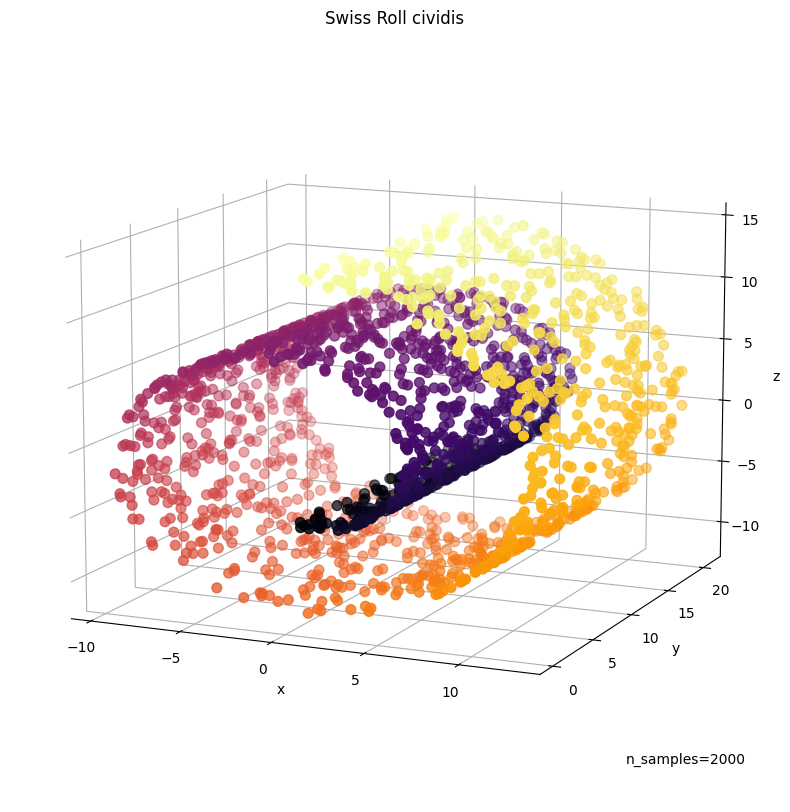

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_nl_train[:, 0], X_nl_train[:, 1], X_nl_train[:, 2], c=y_nl_train, cmap=plt.get_cmap('inferno'), s=50)
ax.set_title('Swiss Roll ' + i)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=2000", transform=ax.transAxes)
# set white background
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()

In [ ]:
print(y_nl_train[2])
print(y_nl_test[2])


9.892835787757834
8.453896441917658


In [ ]:
import numpy as np
train_mean = np.mean(y_nl_train)
for i in range(len(y_nl_train)):
    if y_nl_train[i]<= train_mean:
        y_nl_train[i] = -1
    else:
      y_nl_train[i] = 1


<ipython-input-26-5ee85817b143>:29: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-26-5ee85817b143>:30: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
<ipython-input-26-5ee85817b143>:31: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


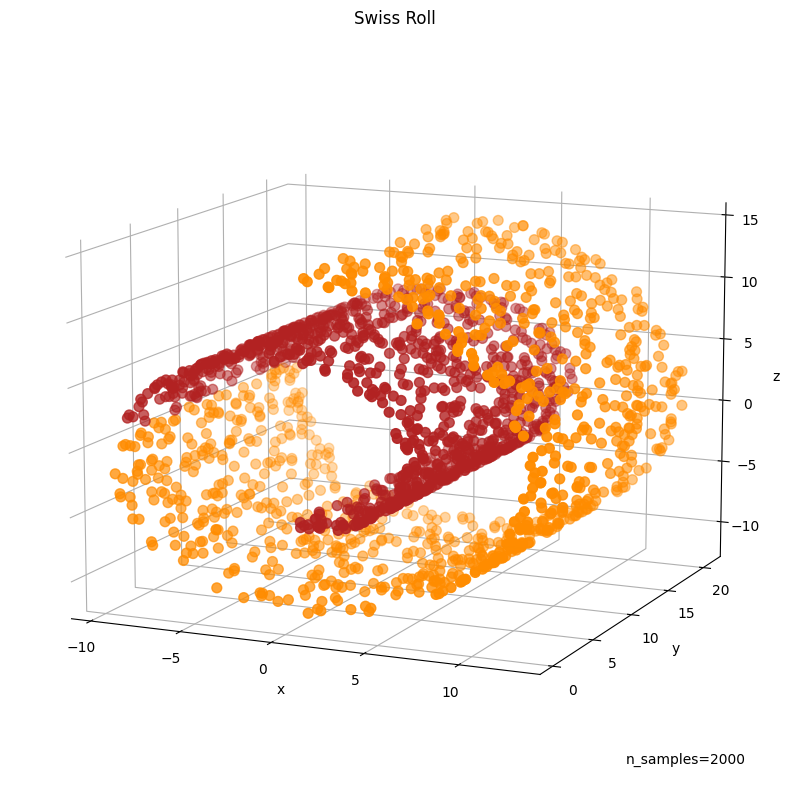

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_swiss_roll
import numpy as np

# Generate the swiss roll dataset
X_nl_train, y_nl_train = make_swiss_roll(n_samples=2000, noise=0.0, random_state=2, hole=False)
X_nl_test, y_nl_test = make_swiss_roll(n_samples=800, noise=0.0, random_state=None, hole=False)

# Binarize y_nl_train based on the mean value
train_mean = np.mean(y_nl_train)
y_nl_train = np.where(y_nl_train <= train_mean, -1, 1)

# Define a colormap with two colors
cmap = ListedColormap(['firebrick', 'darkorange'])

# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_nl_train[:, 0], X_nl_train[:, 1], X_nl_train[:, 2], c=y_nl_train, cmap=cmap, s=50)
ax.set_title('Swiss Roll')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=2000", transform=ax.transAxes)

# Set white background
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()


In [ ]:
y_nl_train.shape

(2000,)

In [ ]:
print('# data2/train_100')
print(f"param m := 800;")
print(f"param m_test := 400;")
print('param n := 3;')
print(f'param nu := 2;')
print(f'param sigma := 10;')
print('param y_train :=')
for x in range(1100):
    print(x+1, y_nl_train[x])
print(';')
print('param A_train : 1 2 3 :=')
for x in range(1100):
    print(x+1, end='')
    for i in X_nl_train[x]:
       print(' ',i,end='')
    print()
print(';')
print('param y_test :=')
a = 1
for x in range(1100, len(y_nl_train)):
    print(a, y_nl_train[x])
    a += 1
print(';')
print('param A_test : 1 2 3 :=')
a= 1
for x in range(1100, len(X_nl_train)):
    print(a, end='')
    for i in X_nl_train[x]:
       print(' ',i,end='')
    print()
    a += 1
print(';')

# data2/train_100
param m := 800;
param m_test := 400;
param n := 3;
param nu := 2;
param sigma := 10;
param y_train :=
1 -1.0
2 -1.0
3 1.0
4 -1.0
5 -1.0
6 -1.0
7 -1.0
8 1.0
9 -1.0
10 -1.0
11 1.0
12 1.0
13 -1.0
14 1.0
15 -1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 -1.0
21 1.0
22 -1.0
23 -1.0
24 -1.0
25 -1.0
26 1.0
27 -1.0
28 -1.0
29 -1.0
30 -1.0
31 -1.0
32 -1.0
33 1.0
34 -1.0
35 1.0
36 -1.0
37 1.0
38 1.0
39 -1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 -1.0
45 1.0
46 -1.0
47 -1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 -1.0
53 -1.0
54 1.0
55 -1.0
56 -1.0
57 -1.0
58 -1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 -1.0
65 -1.0
66 1.0
67 -1.0
68 -1.0
69 1.0
70 -1.0
71 1.0
72 -1.0
73 -1.0
74 -1.0
75 1.0
76 1.0
77 -1.0
78 -1.0
79 1.0
80 -1.0
81 1.0
82 -1.0
83 1.0
84 -1.0
85 1.0
86 -1.0
87 -1.0
88 1.0
89 1.0
90 -1.0
91 -1.0
92 -1.0
93 1.0
94 1.0
95 -1.0
96 -1.0
97 1.0
98 1.0
99 -1.0
100 1.0
101 1.0
102 -1.0
103 1.0
104 1.0
105 1.0
106 1.0
107 -1.0
108 1.0
109 1.0
110 -1.0
111 -1.0
112 1.0
113 -1.0
114 1.0
115 1.0
116 1.0
1

#Breast cancer Wisconsin adaptation

In [ ]:
import pandas as pd
df = pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop(columns='id', inplace=True, axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1})
df = df.sample(frac=1, random_state=12345).reset_index(drop=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,13.150,15.34,85.31,538.9,0.09384,0.08498,0.092930,0.03483,0.1822,...,14.770,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
1,-1,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
2,-1,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.04451,0.1962,...,14.980,17.13,101.10,686.6,0.13760,0.26980,0.25770,0.09090,0.3065,0.08177
3,-1,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.03341,0.1776,...,11.920,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080
4,-1,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.00000,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938


In [ ]:
X = df.loc[:,df.columns != 'diagnosis']
y = df['diagnosis']

from sklearn.model_selection import train_test_split
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
pd.DataFrame(df.values)


#en cas de feature selection
best_features = ['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
                 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
                 'perimeter_worst', 'area_worst', 'concave points_worst']


# Selecciona només les columnes especificades
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

In [ ]:
X_train_np = pd.DataFrame(X_train_selected.values).to_numpy()
y_train_np = pd.DataFrame(y_train.values).to_numpy()
X_test_np = pd.DataFrame(X_test_selected.values).to_numpy()
y_test_np = pd.DataFrame(y_test.values).to_numpy()

In [ ]:
print(len(X_train_np), len(X_train_np[0]))
print(len(X_test_np), len(X_test_np[0]))

426 11
143 11


In [ ]:
print('# data2/train_100')
print(f"param m := 426;")
print(f'param m_test := 143 ;')
print('param n := 11;')
print(f'param nu := 10000;')
print(f'param sigma := 1;')
print('param y_train :=')

for x, y in enumerate(y_train_np):
    print(x+1, y[0])
print(';')
print('param A_train : 1	2	3	4	5	6	7	8	9	10	11	 :=')
for x, y in enumerate(X_train_np):
    print(x+1, end='')
    for i in y:
       print(' ',i,end='')
    print()
print(';')
print('param y_test :=')
for x, y in enumerate(y_test_np):
  print(x+1, y[0])
print(';')
print('param A_test : 1	2	3	4	5	6	7	8	9	10	11	 :=')
for x, y in enumerate(X_test_np):
    print(x+1, end='')
    for i in y:
       print(' ',i,end='')
    print()
print(';')